LAB 07 10/10/2024

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2

    Image thresholding

Ex. 3.1 Read the images ‘grayShades.jpg’ and ‘grayFlowers.jpg’ as grayscale images. Experiment with multiple types of thresholding by changing the parameter type and keeping the same threshold value for each image separately. Display and compare the output images. 

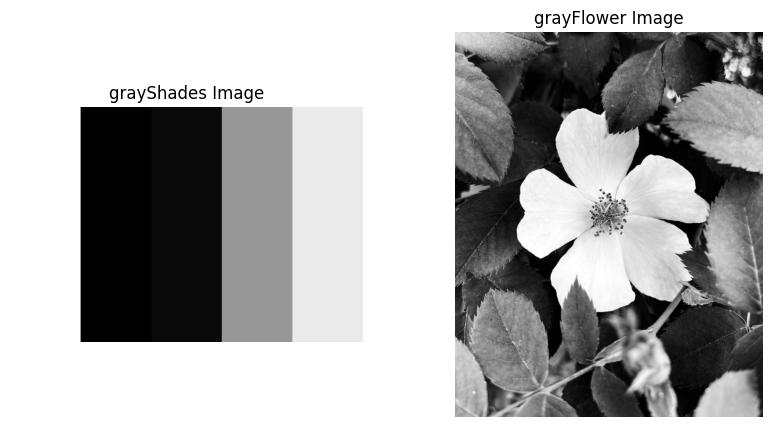

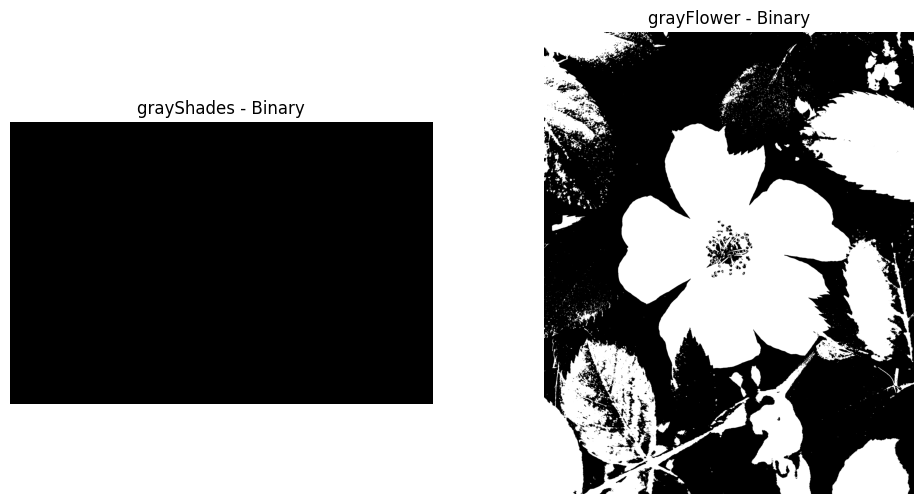

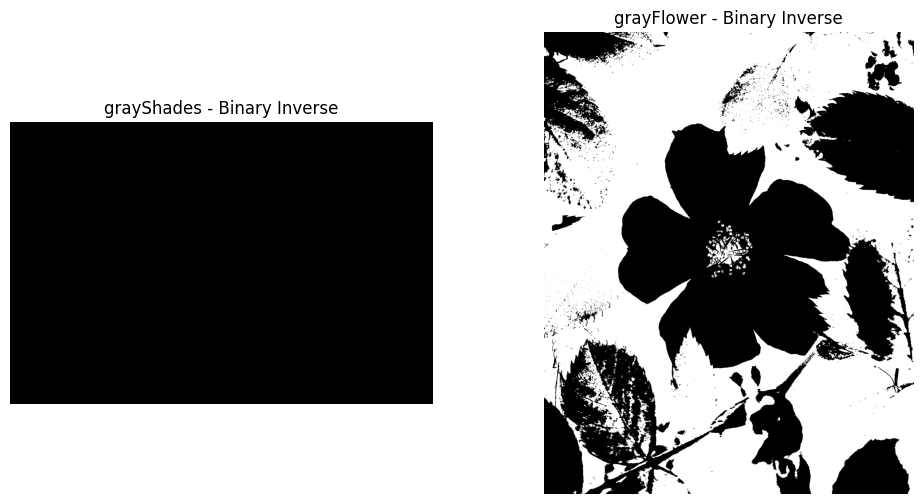

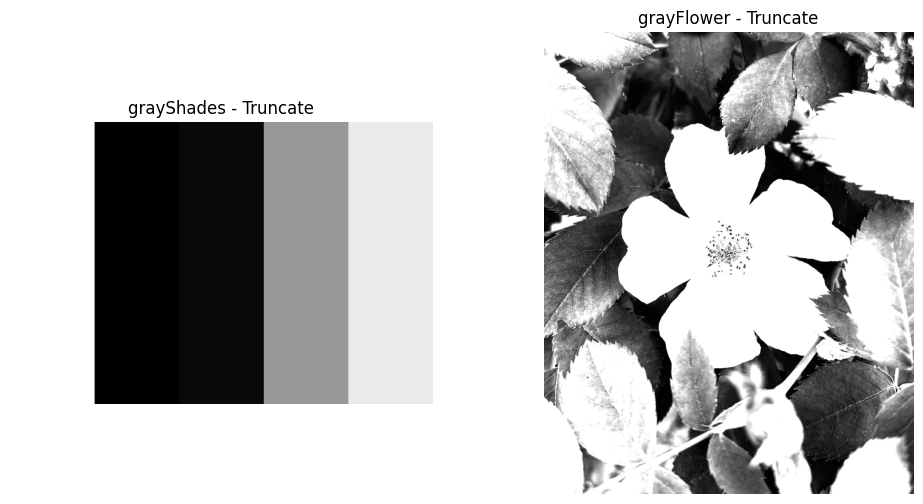

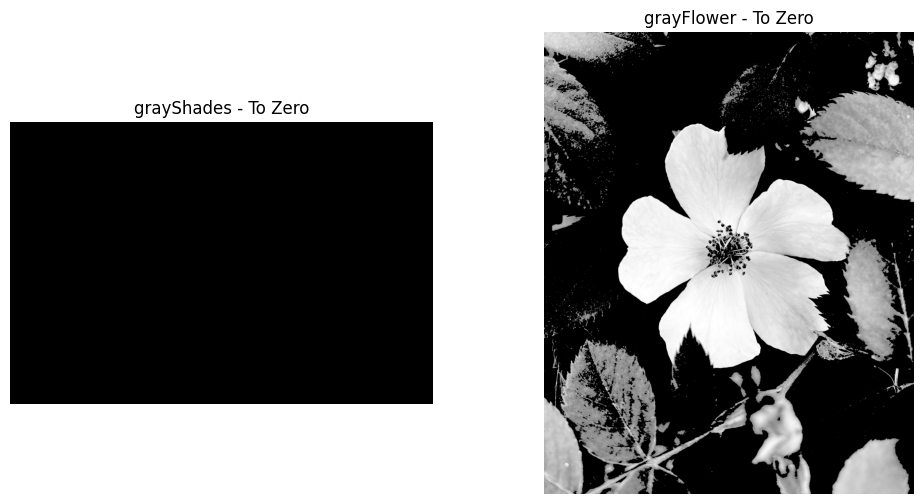

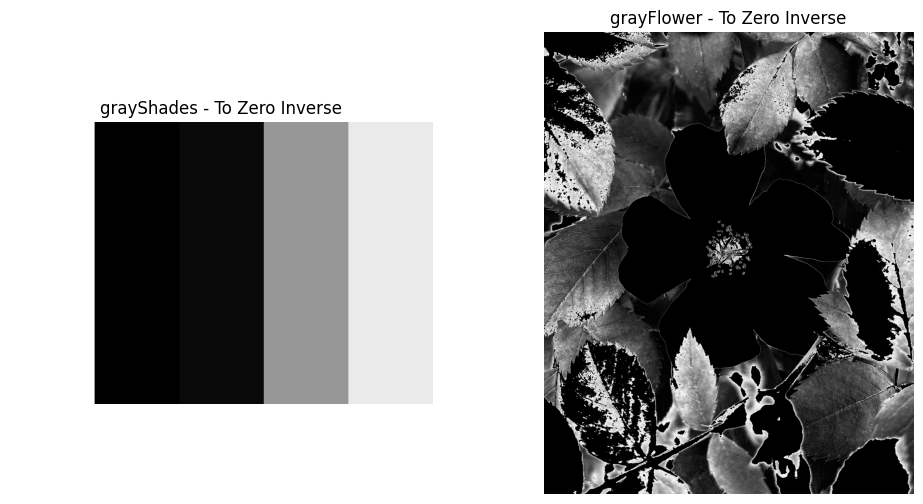

In [37]:
# Đọc ảnh ở chế độ grayscale

image_path_grayShades = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\grayShades.png'
image_grayShades = plt.imread(image_path_grayShades)

image_path_grayFlower = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\grayFlower.jpg'
image_grayFlower = plt.imread(image_path_grayFlower)

image_grayShades = cv2.cvtColor(image_grayShades, cv2.COLOR_BGR2GRAY)
image_grayFlower = cv2.cvtColor(image_grayFlower, cv2.COLOR_BGR2GRAY)

# Kiểm tra xem ảnh có phải là ảnh RGB hay không, nếu có thì chuyển sang grayscale
if len(image_grayShades.shape) == 3:
    image_grayShades = cv2.cvtColor(image_grayShades, cv2.COLOR_RGB2GRAY)
    
if len(image_grayFlower.shape) == 3:
    image_grayFlower = cv2.cvtColor(image_grayFlower, cv2.COLOR_RGB2GRAY)

# Hiển thị ảnh gốc để so sánh
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_grayShades, cmap='gray')
plt.title('grayShades Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_grayFlower, cmap='gray')
plt.title('grayFlower Image')
plt.axis('off')

plt.show()

# Threshold value
threshold_value = 127

# Áp dụng các kiểu thresholding khác nhau
threshold_types = [
    ("Binary", cv2.THRESH_BINARY),
    ("Binary Inverse", cv2.THRESH_BINARY_INV),
    ("Truncate", cv2.THRESH_TRUNC),
    ("To Zero", cv2.THRESH_TOZERO),
    ("To Zero Inverse", cv2.THRESH_TOZERO_INV)
]

# Lưu kết quả thresholding
threshold_results_shades = {}
threshold_results_flowers = {}

# Áp dụng thresholding cho ảnh grayShades
for thresh_name, thresh_type in threshold_types:
    _, thresh_img_shades = cv2.threshold(image_grayShades, threshold_value, 255, thresh_type)
    threshold_results_shades[thresh_name] = thresh_img_shades

# Áp dụng thresholding cho ảnh grayFlowers
for thresh_name, thresh_type in threshold_types:
    _, thresh_img_flowers = cv2.threshold(image_grayFlower, threshold_value, 255, thresh_type)
    threshold_results_flowers[thresh_name] = thresh_img_flowers

# Hiển thị kết quả thresholding cho cả hai ảnh
for thresh_name in threshold_results_shades:
    plt.figure(figsize=(12, 6))

    # Ảnh grayShades
    plt.subplot(1, 2, 1)
    plt.imshow(threshold_results_shades[thresh_name], cmap='gray')
    plt.title(f"grayShades - {thresh_name}")
    plt.axis('off')

    # Ảnh grayFlower
    plt.subplot(1, 2, 2)
    plt.imshow(threshold_results_flowers[thresh_name], cmap='gray')
    plt.title(f"grayFlower - {thresh_name}")
    plt.axis('off')

    plt.show()


Ex. 3.2 Read the image ‘adeverinta.jpg’ as grayscale and repeat the previous exercise. Comment on the output. 

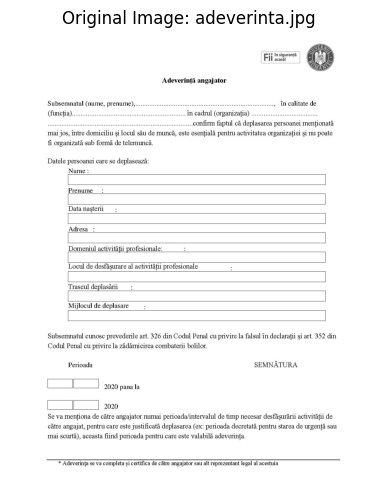

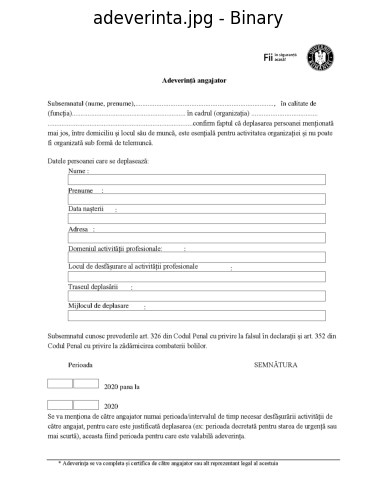

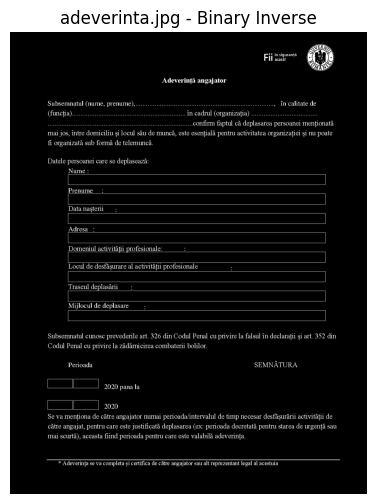

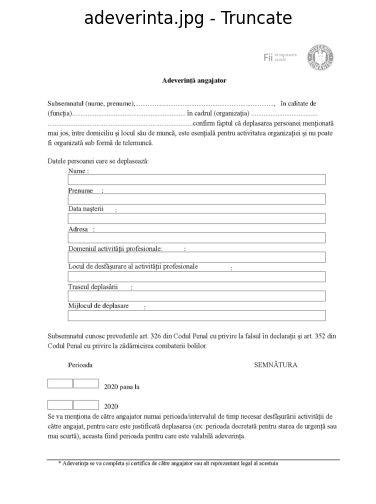

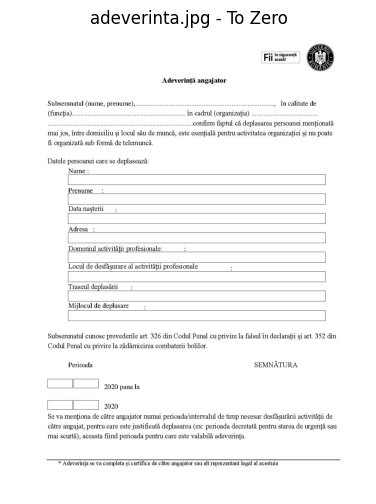

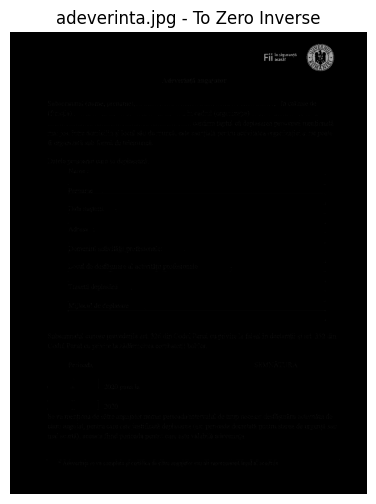

In [34]:
# Đọc ảnh 'adeverinta.jpg' với OpenCV và chuyển sang grayscale
image_path_adeverinta = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\Adeverinta.jpg'
image_adeverinta = plt.imread(image_path_adeverinta)

image_adeverinta = cv2.cvtColor(image_adeverinta, cv2.COLOR_BGR2GRAY)

# Kiểm tra xem ảnh đã ở grayscale hay chưa
if len(image_adeverinta.shape) == 3:
    image_adeverinta = cv2.cvtColor(image_adeverinta, cv2.COLOR_BGR2GRAY)

# Hiển thị ảnh gốc
plt.figure(figsize=(6, 6))
plt.imshow(image_adeverinta, cmap='gray')
plt.title('Original Image: adeverinta.jpg')
plt.axis('off')
plt.show()

# Threshold value
threshold_value = 127

# Áp dụng các kiểu thresholding khác nhau
threshold_types = [
    ("Binary", cv2.THRESH_BINARY),
    ("Binary Inverse", cv2.THRESH_BINARY_INV),
    ("Truncate", cv2.THRESH_TRUNC),
    ("To Zero", cv2.THRESH_TOZERO),
    ("To Zero Inverse", cv2.THRESH_TOZERO_INV)
]

# Lưu kết quả thresholding
threshold_results_adeverinta = {}

# Áp dụng thresholding cho ảnh 'adeverinta.jpg'
for thresh_name, thresh_type in threshold_types:
    _, thresh_img_adeverinta = cv2.threshold(image_adeverinta, threshold_value, 255, thresh_type)
    threshold_results_adeverinta[thresh_name] = thresh_img_adeverinta

# Hiển thị kết quả thresholding cho ảnh 'adeverinta.jpg'
for thresh_name in threshold_results_adeverinta:
    plt.figure(figsize=(6, 6))
    plt.imshow(threshold_results_adeverinta[thresh_name], cmap='gray')
    plt.title(f"adeverinta.jpg - {thresh_name}")
    plt.axis('off')
    plt.show()

    Adaptive thresholding

Ex. 3.3 Read the image ‘adeverinta.jpg’ as grayscale and apply adaptive thresholding (both options). Compare the results with the ones from Ex. 3.2 and justify the outputs. The image has different lighting conditions in different areas and a smoothing filter applied before using adaptive thresholding will reduce the noise.

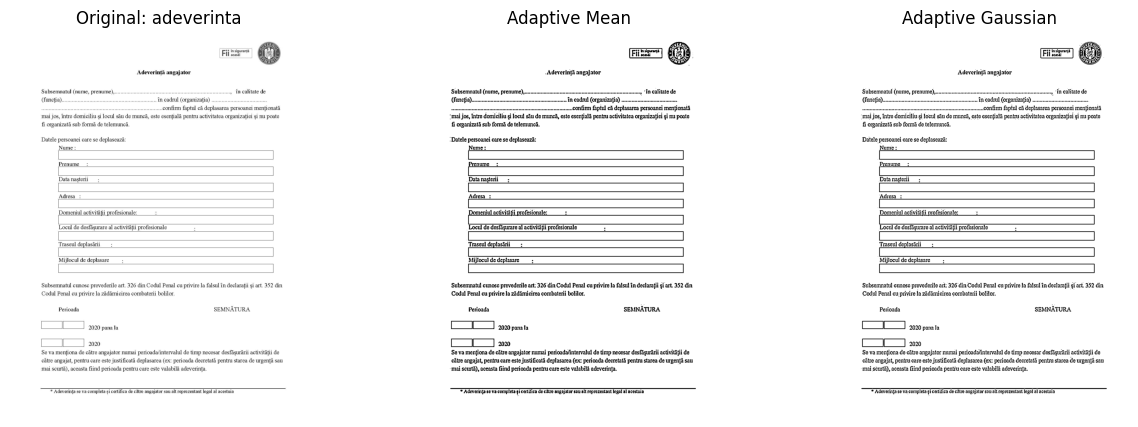

In [36]:
# Gaussian Blur trước khi adaptive thresholding
blurred = cv2.GaussianBlur(image_adeverinta, (5, 5), 0)

# Adaptive thresholding
adaptive_mean = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                      cv2.THRESH_BINARY, 11, 2)
adaptive_gaussian = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                          cv2.THRESH_BINARY, 11, 2)

# Hiển thị kết quả
plt.figure(figsize=(15, 5))
plt.subplot(131); plt.imshow(image_adeverinta, cmap='gray'); plt.title("Original: adeverinta"); plt.axis('off')
plt.subplot(132); plt.imshow(adaptive_mean, cmap='gray'); plt.title("Adaptive Mean"); plt.axis('off')
plt.subplot(133); plt.imshow(adaptive_gaussian, cmap='gray'); plt.title("Adaptive Gaussian"); plt.axis('off')
plt.show()

    Otsu’s thresholding

Ex. 3.4 Read the images ‘rose.jpg’ and ‘yellowFl.jpg’ as grayscale and apply Otsu thresholding. Compare the results with the previous methods. Experiment also with gaussian smoothing before the 
Otsu binarization.

(np.float64(-0.5), np.float64(2999.5), np.float64(3749.5), np.float64(-0.5))

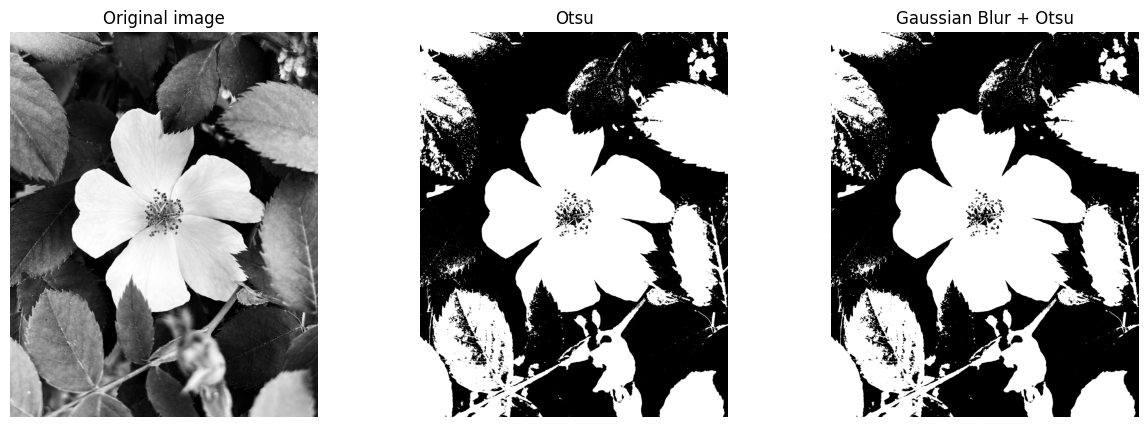

In [39]:
# Otsu thresholding
_, otsu = cv2.threshold(image_grayFlower, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Gaussian Blur + Otsu
blurred = cv2.GaussianBlur(image_grayFlower, (5, 5), 0)
_, otsu_blur = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(15, 5))

plt.subplot(131); plt.imshow(image_grayFlower, cmap='gray'); plt.title("Original image"); plt.axis('off')
plt.subplot(132); plt.imshow(otsu, cmap='gray'); plt.title("Otsu"); plt.axis('off')
plt.subplot(133); plt.imshow(otsu_blur, cmap='gray'); plt.title("Gaussian Blur + Otsu"); plt.axis('off')

Nhận xét:

Otsu thresholding tự động tìm ngưỡng tối ưu từ histogram, rất hiệu quả với ảnh có histogram dạng bimodal.

Kết hợp Gaussian Blur giúp cải thiện hiệu quả khi ảnh có nhiễu hoặc không rõ ràng.

    Morphological Operations

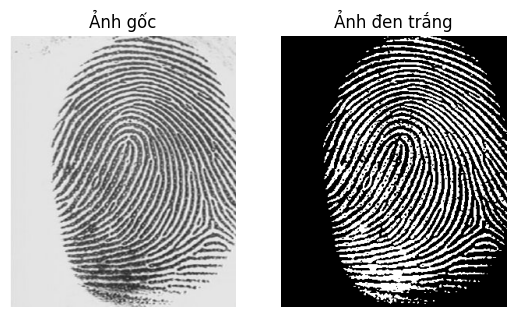

In [2]:
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\Finger.jpg'
image = plt.imread(image_path)
if image is None:
    print("Hình ảnh không đọc được. Vui lòng kiểm tra lại đường dẫn.")
else:
    # Ảnh gốc
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Ảnh gốc")
    plt.axis('off')

    _, bw = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    bw = cv2.bitwise_not(bw)

    # Ảnh đen trắng
    plt.subplot(1, 2, 2)
    plt.imshow(bw)
    plt.title("Ảnh đen trắng")
    plt.axis('off')

In [3]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
kernel

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

(np.float64(-0.5), np.float64(289.5), np.float64(348.5), np.float64(-0.5))

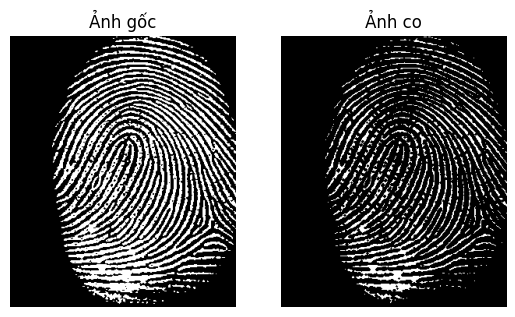

In [4]:
#EROSION
erosion = cv2.erode(bw, kernel, iterations = 1)

plt.subplot(1, 2, 1)
plt.imshow(bw)
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(erosion)
plt.title("Ảnh co")
plt.axis('off')

(np.float64(-0.5), np.float64(289.5), np.float64(348.5), np.float64(-0.5))

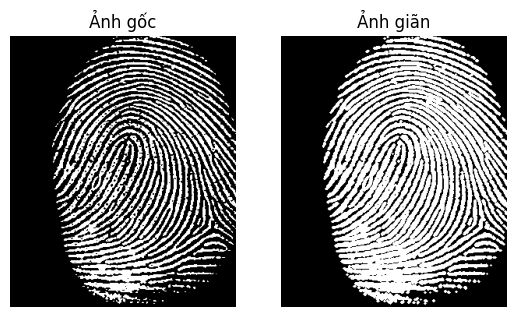

In [5]:
#DILATION
dilation = cv2.dilate(bw, kernel, iterations = 1)

plt.subplot(1, 2, 1)
plt.imshow(bw)
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(dilation)
plt.title("Ảnh giãn")
plt.axis('off')

(np.float64(-0.5), np.float64(289.5), np.float64(348.5), np.float64(-0.5))

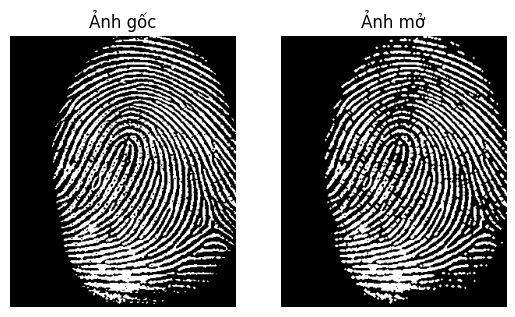

In [6]:
#OPEN
opening = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)

plt.subplot(1, 2, 1)
plt.imshow(bw)
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(opening)
plt.title("Ảnh mở")
plt.axis('off')

(np.float64(-0.5), np.float64(289.5), np.float64(348.5), np.float64(-0.5))

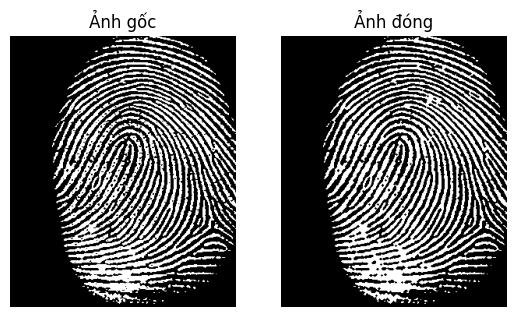

In [14]:
#CLOSE
closing = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)

plt.subplot(1, 2, 1)
plt.imshow(bw)
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(closing)
plt.title("Ảnh đóng")
plt.axis('off')

(np.float64(-0.5), np.float64(289.5), np.float64(348.5), np.float64(-0.5))

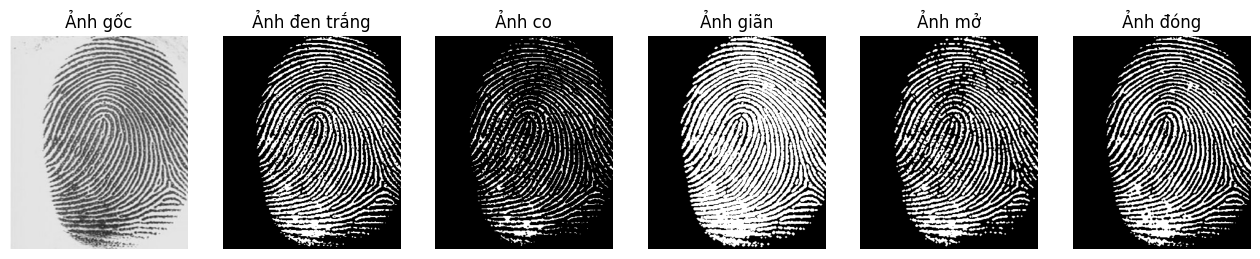

In [17]:
plt.figure(figsize=(16, 10))

plt.subplot(1, 6, 1)
plt.imshow(image)
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(1, 6, 2)
plt.imshow(bw)
plt.title("Ảnh đen trắng")
plt.axis('off')

plt.subplot(1,6,3)
plt.imshow(erosion)
plt.title("Ảnh co")
plt.axis('off')

plt.subplot(1,6,4)
plt.imshow(dilation)
plt.title("Ảnh giãn")
plt.axis('off')

plt.subplot(1,6,5)
plt.imshow(opening)
plt.title("Ảnh mở")
plt.axis('off')

plt.subplot(1,6,6)
plt.imshow(closing)
plt.title("Ảnh đóng")
plt.axis('off')